<a href="https://colab.research.google.com/github/sapinspys/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd

In [0]:
# Creating a header... how could we use the .names file? Google didn't help

columns = ["class-name",
           "handicapped-infants",
           "water-project-cost-sharing",
           "adoption-of-the-budget-resolution",
           "physician-fee-freeze","el-salvador-aid",
           "religious-groups-in-schools","anti-satellite-test-ban",
           "aid-to-nicaraguan-contras", "mx-missile", "immigration",
           "synfuels-corporation-cutback", 
           "education-spending","superfund-right-to-sue",
           "crime",
           "duty-free-exports", 
           "export-administration-act-south-africa"]

In [0]:
# More information about our data below
# !curl https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names

In [0]:
# Loading our data 

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", names=columns)
print(df.shape)
df.head()

(435, 17)


,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# 4. Relevant Information:
#       This data set includes votes for each of the U.S. House of
#       Representatives Congressmen on the 16 key votes identified by the
#       CQA.  The CQA lists nine different types of votes: voted for, paired
#       for, and announced for (these three simplified to yea), voted
#       against, paired against, and announced against (these three
#       simplified to nay), voted present, voted present to avoid conflict
#       of interest, and did not vote or otherwise make a position known
#       (these three simplified to an unknown disposition).

# Maybe we can transform the ? to equal 0 instead to signify "unknown"
# Let's also convert into republican/dem to 0/1
# and n/y to 1/2

df.replace(to_replace=['republican', 'democrat', '?', 'n', 'y'], value=[0, 1, 0, 1, 2], inplace=True)
df.head()

,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,0,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
2,1,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,1,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,1,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2


In [0]:
# Check for any null, NaN, or other values

print(df.isnull().sum(), "\n")
print(df.isna().sum())

class-name                                0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64 

class-name                                0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid  

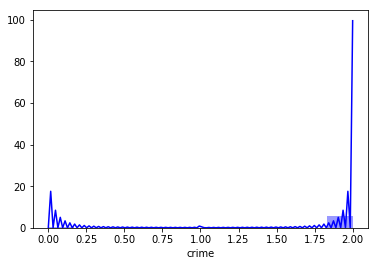

In [0]:
import seaborn as sns

sns.distplot(df[df['class-name'] == 0]['crime'], color = 'b')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


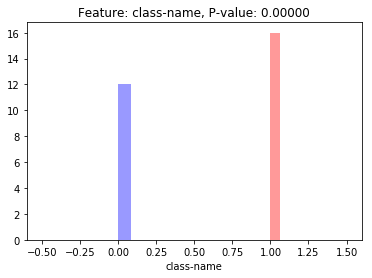

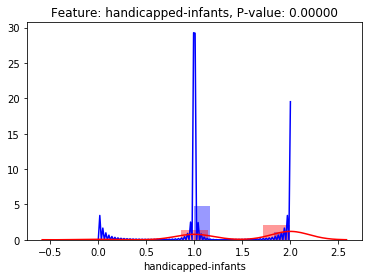

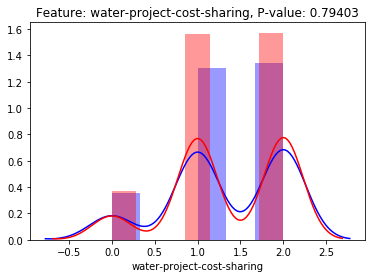

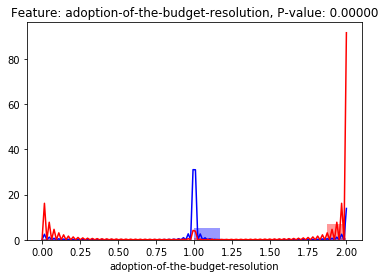

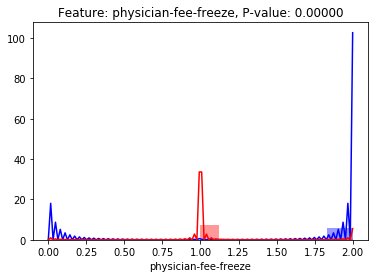

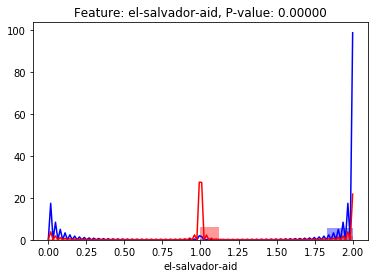

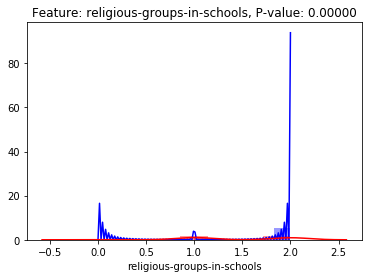

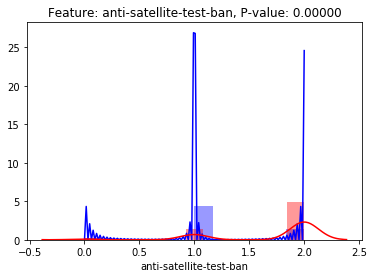

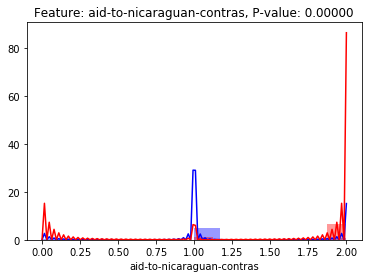

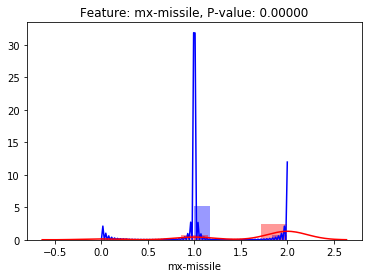

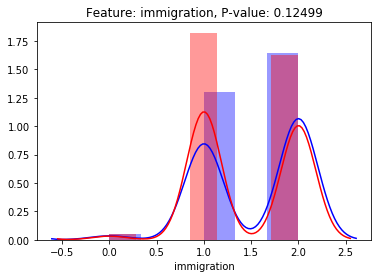

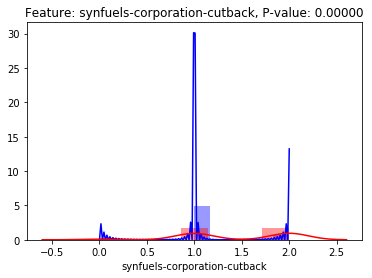

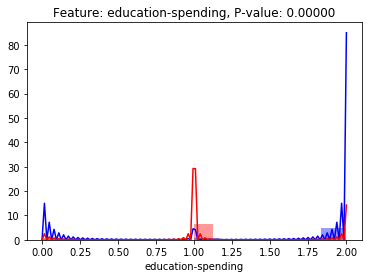

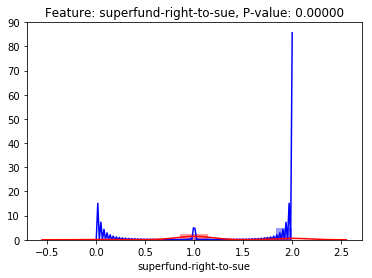

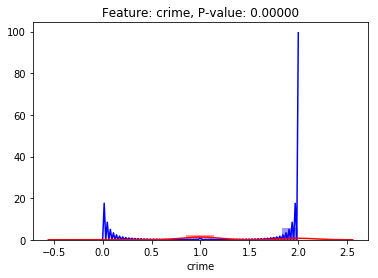

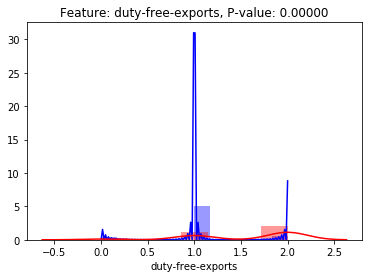

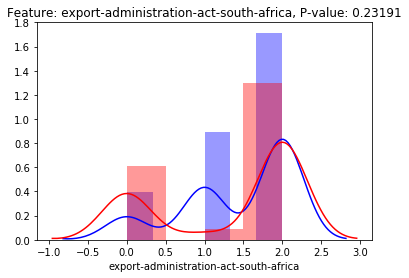

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

for feat in df.columns:
  # Split groups
  group1 = df[df['class-name'] == 0][feat]
  group2 = df[df['class-name'] == 1][feat]
  
  # Plot distribution
  sns.distplot(group1, color = 'b')
  sns.distplot(group2, color = 'r')
  
  # Run t-test
  _, pvalue = ttest_ind(group1, group2)
  
  # Plot
  plt.title(f'Feature: {feat}, P-value: {pvalue:.5f}')
  plt.figure()